In [63]:
import numpy as np
import scipy  as sp
from scipy import signal
import cv2
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
dir_path = './data/drop-211025-2'
img_path_list = [dir_path+'/'+ f for f in os.listdir(dir_path) if f.endswith('.jpg')]
img_path_list.sort()
img_path_list

['./data/drop-211025-2/drop-010.jpg',
 './data/drop-211025-2/drop-020.jpg',
 './data/drop-211025-2/drop-030.jpg',
 './data/drop-211025-2/drop-040.jpg',
 './data/drop-211025-2/drop-050.jpg',
 './data/drop-211025-2/drop-060.jpg',
 './data/drop-211025-2/drop-070.jpg',
 './data/drop-211025-2/drop-080.jpg',
 './data/drop-211025-2/drop-090.jpg',
 './data/drop-211025-2/drop-100.jpg',
 './data/drop-211025-2/drop-110.jpg',
 './data/drop-211025-2/drop-120.jpg',
 './data/drop-211025-2/drop-130.jpg',
 './data/drop-211025-2/drop-140.jpg',
 './data/drop-211025-2/drop-150.jpg',
 './data/drop-211025-2/drop-160.jpg',
 './data/drop-211025-2/drop-170.jpg',
 './data/drop-211025-2/drop-180.jpg',
 './data/drop-211025-2/drop-190.jpg',
 './data/drop-211025-2/drop-200.jpg']

In [8]:
img_path = './data/darkglass/20.jpg'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

cv2.imshow('myImage', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
img_earth = cv2.imread("Earth.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow('Earth', img_earth)
cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
#Adaptive histogramm equalization

def clahe_eq(img, clipLimit=5, tileGridSize=(8,8), show=True):
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    img_clahe = clahe.apply(img)

    if show:
        cv2.imshow('myImage', img_clahe)
        cv2.waitKey()
        cv2.destroyAllWindows()
        
    return img_clahe



In [104]:
def calculate_2dft(img):
    img = sp.fft.ifftshift(img)
    ft = sp.fft.fft2(img)
    ft = sp.fft.fftshift(ft)
    return ft

def calculate_2dift(ft):
    ft = sp.fft.ifftshift(ft)
    ift = sp.fft.ifft2(ft)
    ift = sp.fft.fftshift(ift)
    return ift.real

    

[[125 126 127 ... 102 102 102]
 [126 126 127 ... 103 103 103]
 [126 127 128 ... 103 103 103]
 ...
 [121 121 121 ...  99  99  98]
 [122 122 121 ... 100  99  99]
 [122 122 121 ... 100  99  99]]
[[125. 126. 127. ... 102. 102. 102.]
 [126. 126. 127. ... 103. 103. 103.]
 [126. 127. 128. ... 103. 103. 103.]
 ...
 [121. 121. 121. ...  99.  99.  98.]
 [122. 122. 121. ... 100.  99.  99.]
 [122. 122. 121. ... 100.  99.  99.]]


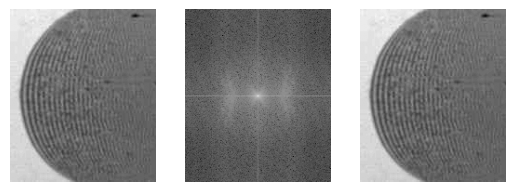

In [110]:
ft_img = calculate_2dft(img)
ift_img = calculate_2dift(ft_img)
print(img, ift_img, sep="\n")

plt.set_cmap("gray")

plt.subplot(131)
plt.imshow(img)
plt.axis("off")
plt.subplot(132)
plt.imshow(np.log(abs(ft_img)))
plt.axis("off")
plt.subplot(133)
plt.imshow(ift_img)
plt.axis("off")
plt.show()

(186, 157)


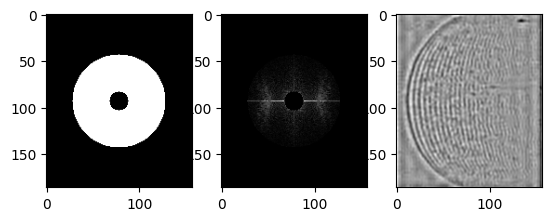

In [111]:
shape = ft_img.shape

print(shape)
mask = np.ones(shape)

center = (int((shape[0])/2), int((shape[1])/2))
h, w = (2,2)
R1 = 10
R2 = 50

#print(center[0]-h,center[0]+h, center[1]-w,center[1]+w, sep="\n")
#mask[center[0]-h:center[0]+h, center[1]-w:center[1]+w] = 0.1
for v in range(R1+1):
    for u in range(R1+1):
        if v**2+u**2 <= R1**2:
            mask[center[0]-v, center[1]-u] = 0
            mask[center[0]-v, center[1]+u] = 0
            mask[center[0]+v, center[1]-u] = 0
            mask[center[0]+v, center[1]+u] = 0


mask[0:center[0]-R2, :] = 0
mask[center[0]+R2:, :] = 0
mask[:, 0:center[1]-R2] = 0
mask[:, center[1]+R2:] = 0

for v in range(int(R2/np.sqrt(2))-1,R2+1):
    for u in range(R2+1):
        if v**2+u**2 > R2**2:
            mask[center[0]-v, center[1]-u] = 0
            mask[center[0]-v, center[1]+u] = 0
            mask[center[0]+v, center[1]-u] = 0
            mask[center[0]+v, center[1]+u] = 0
            mask[center[0]-u, center[1]-v] = 0
            mask[center[0]-u, center[1]+v] = 0
            mask[center[0]+u, center[1]-v] = 0
            mask[center[0]+u, center[1]+v] = 0
        

ft_masked = ft_img*mask

ift_img = calculate_2dift(ft_masked)

plt.set_cmap("gray")

plt.subplot(131)
plt.imshow(mask)

plt.subplot(132)
plt.imshow(abs(ft_masked))

plt.subplot(133)
plt.imshow(ift_img)
plt.show()

In [112]:
print(ift_img)

[[  6.36967555  10.28884861   4.88106211 ...  -2.80480033  -8.78492821
   -5.320844  ]
 [  7.18540039  11.27556941   6.22290551 ...  -2.11333443  -7.89600841
   -4.43079982]
 [  7.10612723  11.18293772   6.16143765 ...  -2.29864041  -7.9714012
   -4.46878224]
 ...
 [  4.30164634   7.68945092   2.10367195 ...  -4.367293   -10.15375973
   -6.80273955]
 [  4.0069472    7.41060538   1.55645288 ...  -4.52536965 -10.66180672
   -7.35042829]
 [  4.88382655   8.49882497   2.70961762 ...  -3.94835965 -10.11916126
   -6.72125646]]


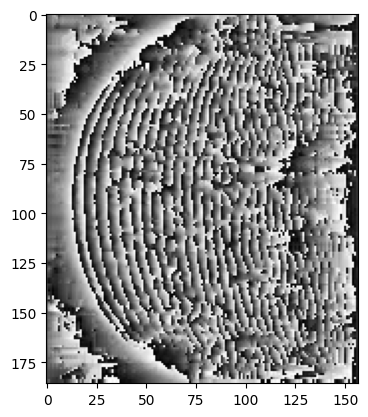

In [24]:
phase_portrate = []

for sig in ift_img:
    anal_sig = signal.hilbert(np.real(sig))
    inst_phase = np.angle(anal_sig)
    phase_portrate.append(inst_phase)

phase = np.array(phase_portrate)

plt.imshow(phase)
plt.show()